## Time Series Analysis: Home Assignment 2

due to **14.03.21 23:00** MSK


Enter your name below: 

In [1]:
name='' 

### Contents

1. **Data preparation (6 points)**
    0. Import functions 
    1. Data parsing(1.5 pt.)
    2. Join datasets (1 pt.)
    3. Dates transformation (2 pt.)
    4. Plot time series (0.75 pt.)
    5. Test and train split (0.75 pt.)
    
 
2. **ARIMA models (6 points)**

    1. Stationarity (0.75 pt.) 
    2. AutoArima (1.5 pt.)
    3. AutoSarima (1.5 pt.)
    4. GridSearch (1 pt.)
    5. Interval forecasts (1.25 pt.)

    

## 1. Data preparation
[back to contents](#Contents)

### 1.0 Import functions
[back to contents](#Contents)

In [5]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import AutoARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sktime.performance_metrics.forecasting import smape_loss

### 1.1 Data parsing (1.5 pt.)
[back to contents](#Contents)

You need to parse quarterly sales data for Amazon. 

```dfs=pd.read_html('https://ycharts.com/companies/AMZN/revenues')```

```read_html``` reads HTML tables.  


In [6]:
dfs=pd.read_html('https://ycharts.com/companies/AMZN/revenues')


How many tables have been read by ```read_html```?

To answer this question find the length of the list dfs: ```len(dfs)```

In [7]:
len(dfs)

5

Which tables from ```dfs``` will you use further?

In [8]:
#will use table 0 and table 1 because it includes the data on AMAZON


Create a new dataframe for sales from 2014 to 2020

```df1=dfs[0]```

In [9]:
df1=dfs[0]


Create a new dataframe for sales from 2008 to 2014

```df2=dfs[1]```

In [10]:
df2=dfs[1]


### 1.2 Join datasets (1 pt.)
[back to contents](#Contents)

Join two datasets ```df1, df2```:

```joined_data=np.concatenate([...,...])```

In [11]:
joined_data=np.concatenate([df1,df2])


Change a format of ```joined_data``` to pandas dataframe:

```df=pd.DataFrame(...)```

In [12]:
df = pd.DataFrame(joined_data)


Rename columns to ```'date'``` and ```'sales'```:

```df.columns = ['...','...']```

In [13]:
df.columns = ["date","sales"]
df.head()

,date,sales
0,"Dec. 31, 2020",125.56B
1,"Sept. 30, 2020",96.14B
2,"June 30, 2020",88.91B
3,"March 31, 2020",75.45B
4,"Dec. 31, 2019",87.44B


Delete 'B' in each row in ``` 'sales' ``` column and transform it to float format:

```df['...']=df['...'].apply(lambda x: float(x[:len(x)-1]))```

lambda function ```lambda x:``` applies a function after  ```:```  to each row in ```df['...']```.

```float(...)``` changes a format to float. This part of the code ```x[:len(x)-1]``` returns a string ```x``` without the last character ```'B'```. 

In [14]:
df['sales']=df['sales'].apply(lambda x: float(x[:len(x)-1]))

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [15]:
# in text format (Month 01, Year)
df.head()

,date,sales
0,"Dec. 31, 2020",125.56
1,"Sept. 30, 2020",96.14
2,"June 30, 2020",88.91
3,"March 31, 2020",75.45
4,"Dec. 31, 2019",87.44


Change abbreviations of months to their names.

Create a dictionary with keys = abbreviations and values = months' names. 

dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}


```df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])```

In [16]:
dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}

df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])

Transform dates to datetime format:

``` df['...']=pd.to_datetime(df['...'], format='...') ```

Use the appropriatee format. For example, for ```'2020---13 : December'``` the format is ```'%Y---%d : %B'```.

For ```'11, March.,2013'``` you need to use  ```'%d, %B.,%Y'```


In [17]:
df['date']=pd.to_datetime(df['date'], format='%B %d, %Y')

Change index to dates:

``` df.index=.... ```

In [18]:
df.index= df["date"]

What is the size of the dataset?

use ```.shape```

In [19]:
df.shape

(50, 2)

Drop columns ['date']:

```df=df.drop(..., axis=1)```

In [20]:
df=df.drop("date", axis=1)

What is the size of the dataset now?

In [21]:
df.shape

(50, 1)

Change the frequency of the data to make x-labels readable:

```df.index=df.index.to_period('...')```

use ```'Q' ``` for quarterly data, ```'M' ``` for monthly data. 

In [22]:
df.index=df.index.to_period('Q')

### 1.4 Plot time series (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['sales']```

In [23]:
y = df["sales"]

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [24]:
y = np.flip(y)


Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

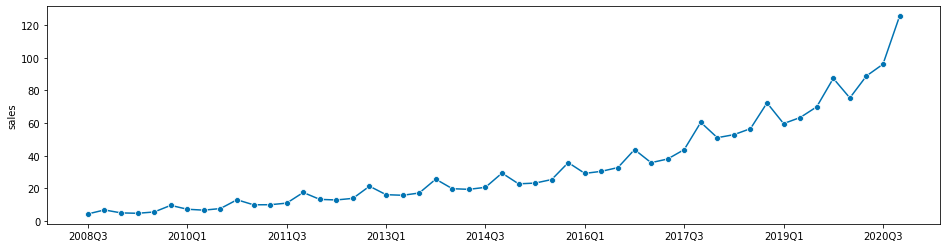

In [25]:
plot_series(y)

### 1.5 Split the data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [26]:
y_train, y_test = temporal_train_test_split(y, test_size = 0.2)

plot train and test samples using ```plot_series``` 

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

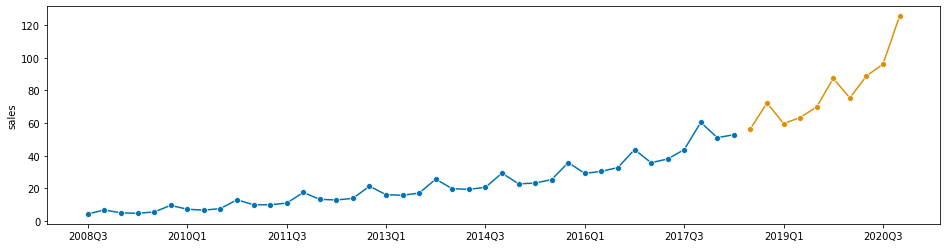

In [27]:
plot_series(y_train,y_test)

## 2. ARIMA models (6 pt.)
[back to contents](#Contents)

### 2.1 Check stationarity (0.75 pt.)
[back to contents](#Contents)

Check whether the time series  is stationary

Use ```adfuller``` and ```kpss```

In [28]:
adfuller(y_train)[1] < 0.05

False

In [29]:
kpss(y_train)[1]>0.05

C:\Users\zkamakinova\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


False

If it is not stationary, take differences until the time series becomes stationary

```np.diff(y_train)```

In [30]:
# yes it is not stationary

In [31]:
y_diff = np.diff(y_train)
y_diff = np.diff(y_diff)

y_diff_test = np.diff(np.diff(y_test))

y_diff = pd.Series(y_diff)
y_diff_test = pd.Series(y_diff_test)

What is the order of integration?

In [32]:
# two because
adfuller(y_diff)[1]<0.05
kpss(y_diff)[1]>0.05

C:\Users\zkamakinova\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\zkamakinova\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


True

### 2.2 Estimate AutoArima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime```

Estimate AutoArima and name the result ```model_AArima```:

```AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_AArima.fit(...)```


In [33]:
model_AArima = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)

model_AArima.fit(y_train)

AutoARIMA(d=2, max_p=4, max_q=4, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)``` has been chosen as the best?

```.summary()``` 

In [34]:
model_AArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(3, 2, 1)   Log Likelihood                 -70.378
Date:                Mon, 08 Mar 2021   AIC                            152.756
Time:                        22:04:21   BIC                            162.582
Sample:                             0   HQIC                           156.252
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3921      0.396      0.990      0.322      -0.384       1.169
ar.L1         -1.0031      0.055    -18.180      0.000      -1.111      -0.895
ar.L2         -0.9979      0.040    -24.962      0.000      -1.076      -0.920
ar.L3         -0.9894      0.015    -67.919      0.000      -1.018      -0.961
ma.L1          0.1338      0.212      0.632      0.528      -0.281       0.549
sigma2         1.7385      0.348      5.000      0.000       1.057       2.420
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                43.44
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             1.49
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# code here (0.5 pt.)
print('ARIMA(0,1,1)')

ARIMA(0,1,1)


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_AArima.predict(fh=...)```

In [38]:
y_pred_AArima = model_AArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

0.07016525931512385

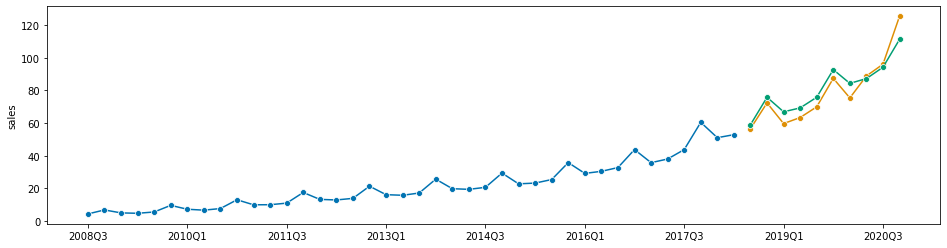

In [39]:
plot_series(y_train, y_test, y_pred_AArima)
smape_loss(y_test, y_pred_AArima)

### 2.3 Estimate AutoSarima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime``` as well

Estimate AutoSarima and name the result ```model_ASArima```

The only difference from AutoArima is the seasonality period inside ```AutoARIMA```:

```AutoARIMA(sp=...,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_ASArima.fit(...)```


In [43]:
model_ASArima=AutoARIMA(sp=4,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)

model_ASArima.fit(y_train)

AutoARIMA(d=2, max_p=4, max_q=4, sp=4, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)(P,D,Q)s``` has been chosen as the best?

```.summary()``` 

In [41]:
model_ASArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(2, 2, 1)x(2, 1, [], 4)   Log Likelihood                 -48.207
Date:                            Mon, 08 Mar 2021   AIC                            108.413
Time:                                    22:05:30   BIC                            117.571
Sample:                                         0   HQIC                           111.536
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5410      0.210      2.578      0.010       0.130       0.952
ar.L2         -0.4379      0.227     -1.926      0.054      -0.884       0.008
ma.L1         -0.9699      0.161     -6.033      0.000      -1.285      -0.655
ar.S.L4        0.4836      0.580      0.834      0.404      -0.653       1.620
ar.S.L8        0.4340      0.623      0.697      0.486      -0.787       1.655
sigma2         0.8119      0.240      3.379      0.001       0.341       1.283
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.75
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               7.92   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# code here (0.5 pt.)
print('SARIMAX(2, 2, 1)x(2, 1, [], 4)')

SARIMAX(2, 2, 1)x(2, 1, [], 4)


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_ASArima.predict(fh=...)```

In [46]:
y_pred  = model_ASArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

0.14358809439793646

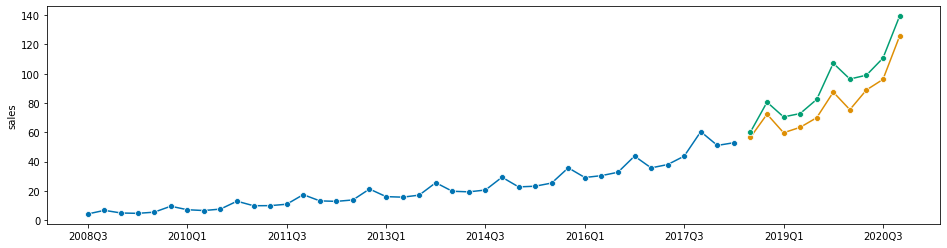

In [47]:
plot_series(y_train, y_test, y_pred)
smape_loss(y_test, y_pred)

### 2.4 GridSearch (1 pt.)
[back to contents](#Contents)

Use GridSearch to choose the seasonality period, which gives the highest SMAPE 

```model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

Cross validation

```CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)```

```gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8]})```

Fit on the train set:

gscv.fit()

Return results

df=pd.DataFrame(gscv. ...)

Sort values in df by ```'rank_test_sMAPE'```

```df.sort_values(by=['...'])```

In [48]:
model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=2)

CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)
gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8]})

gscv.fit(y_train)


ForecastingGridSearchCV(cv=<sktime.forecasting.model_selection._split.SlidingWindowSplitter object at 0x000001F954825C70>,
                        forecaster=AutoARIMA(d=2, max_p=4, max_q=4,
                                             suppress_warnings=True),
                        param_grid={'sp': [2, 4, 8]})

What seasonality period would you choose and why?

In [49]:
df = pd.DataFrame(gscv.cv_results_)
df.sort_values(by=['rank_test_sMAPE'])

,mean_fit_time,mean_score_time,param_sp,params,mean_test_sMAPE,rank_test_sMAPE
1,3.829828,0.022939,4,{'sp': 4},0.577491,1
0,2.708012,0.019953,2,{'sp': 2},0.590824,2
2,2.786012,0.016955,8,{'sp': 8},1.119566,3


### 2.5 Interval forecasts AutoArima (1.25 pt.)
[back to contents](#Contents)

Get 95% confidence intervals either for ```model_ASArima``` or for ```gscv```:

For example:

```y_pred_ASArima_best=model_ASArima.predict(fh=..., return_pred_int=True)```

Mean forecast or point forecast

mean=y_pred_ASArima_best[0]

Lower and upper bounds

upper_int=...

lower_int=...

In [50]:
y_pred_ASArima_best=model_ASArima.predict(fh=np.arange(len(y_test))+1, return_pred_int=True)
mean=y_pred_ASArima_best[0]
upper_int =  y_pred_ASArima_best[1]["lower"]
lower_int =  y_pred_ASArima_best[1]["upper"]

Plot mean forecast, upper and lower intervals, test set:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='lower'>)

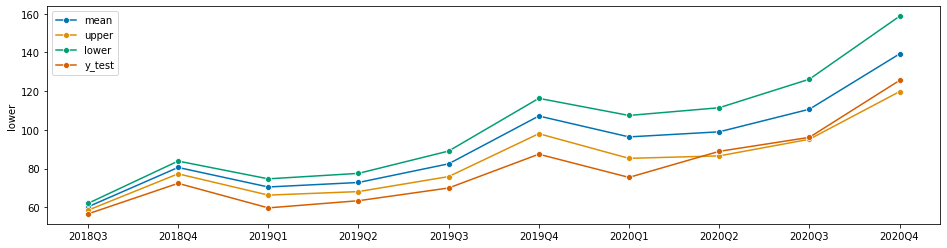

In [52]:
plot_series(mean, upper_int, lower_int, y_test,  labels=["mean", "upper", "lower", "y_test"])